In [1]:
%pip install yfinance pandas matplotlib seaborn statsmodels

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


  Using cached yfinance-0.2.48-py2.py3-none-any.whl.metadata (13 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.17.7.tar.gz (939 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached yfinance-0.2.48-py2.py3-none-any.whl (101 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138951 sha256=49c2e6e3b91f73f42d1063914a4573d50ff7c3563c8bfc03f6fca6547da88d98
  Stored in directory: c:\users\nejat\appdata\local\pip\cache\wheels\fd\28\34\9ba1363b76703fe3

In [2]:
tickers = ["TSLA", "BND", "SPY"]
start_date = "2015-01-01"
end_date = "2024-10-31"

def fetch_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end)
    data.reset_index(inplace=True)
    return data

tsla_data = fetch_data("TSLA", start_date, end_date)
bnd_data = fetch_data("BND", start_date, end_date)
spy_data = fetch_data("SPY", start_date, end_date)

tsla_data.head(), bnd_data.head(), spy_data.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(Price                       Date  Adj Close      Close       High        Low  \
 Ticker                                 TSLA       TSLA       TSLA       TSLA   
 0      2015-01-02 00:00:00+00:00  14.620667  14.620667  14.883333  14.217333   
 1      2015-01-05 00:00:00+00:00  14.006000  14.006000  14.433333  13.810667   
 2      2015-01-06 00:00:00+00:00  14.085333  14.085333  14.280000  13.614000   
 3      2015-01-07 00:00:00+00:00  14.063333  14.063333  14.318667  13.985333   
 4      2015-01-08 00:00:00+00:00  14.041333  14.041333  14.253333  14.000667   
 
 Price        Open    Volume  
 Ticker       TSLA      TSLA  
 0       14.858000  71466000  
 1       14.303333  80527500  
 2       14.004000  93928500  
 3       14.223333  44526000  
 4       14.187333  51637500  ,
 Price                       Date  Adj Close      Close       High        Low  \
 Ticker                                  BND        BND        BND        BND   
 0      2015-01-02 00:00:00+00:00  63.358753  82.65

In [3]:
print("Missing values in TSLA data:\n", tsla_data.isnull().sum())
print("Missing values in BND data:\n", bnd_data.isnull().sum())
print("Missing values in SPY data:\n", spy_data.isnull().sum())

tsla_data.fillna(method='ffill', inplace=True)
bnd_data.fillna(method='ffill', inplace=True)
spy_data.fillna(method='ffill', inplace=True)

tsla_data['Date'] = pd.to_datetime(tsla_data['Date'])
bnd_data['Date'] = pd.to_datetime(bnd_data['Date'])
spy_data['Date'] = pd.to_datetime(spy_data['Date'])

tsla_data.info(), bnd_data.info(), spy_data.info()


Missing values in TSLA data:
 Price      Ticker
Date                 0
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
dtype: int64
Missing values in BND data:
 Price      Ticker
Date                 0
Adj Close  BND       0
Close      BND       0
High       BND       0
Low        BND       0
Open       BND       0
Volume     BND       0
dtype: int64
Missing values in SPY data:
 Price      Ticker
Date                 0
Adj Close  SPY       0
Close      SPY       0
High       SPY       0
Low        SPY       0
Open       SPY       0
Volume     SPY       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474 entries, 0 to 2473
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   (Date, )           2474 non-null   datetime64[ns, UTC]
 1   (Adj Close, TSLA)  2474 non-null   float64   

C:\Users\nejat\AppData\Local\Temp\ipykernel_7204\893827677.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data.fillna(method='ffill', inplace=True)
C:\Users\nejat\AppData\Local\Temp\ipykernel_7204\893827677.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bnd_data.fillna(method='ffill', inplace=True)
C:\Users\nejat\AppData\Local\Temp\ipykernel_7204\893827677.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data.fillna(method='ffill', inplace=True)


(None, None, None)

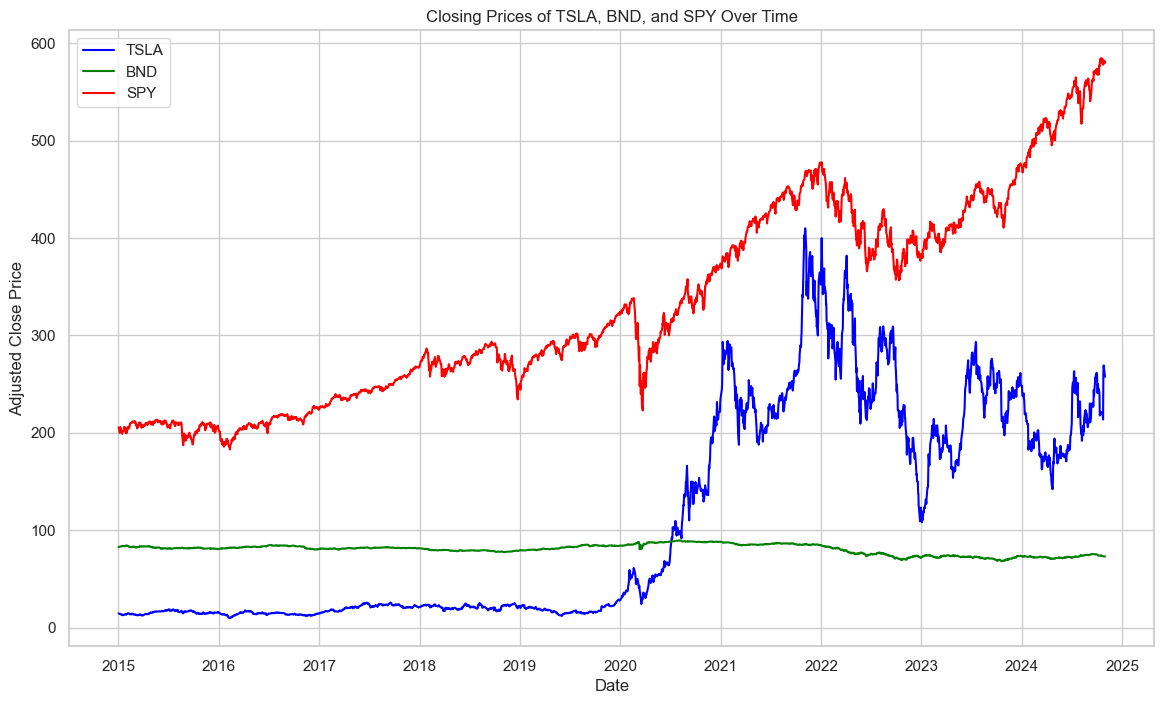

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


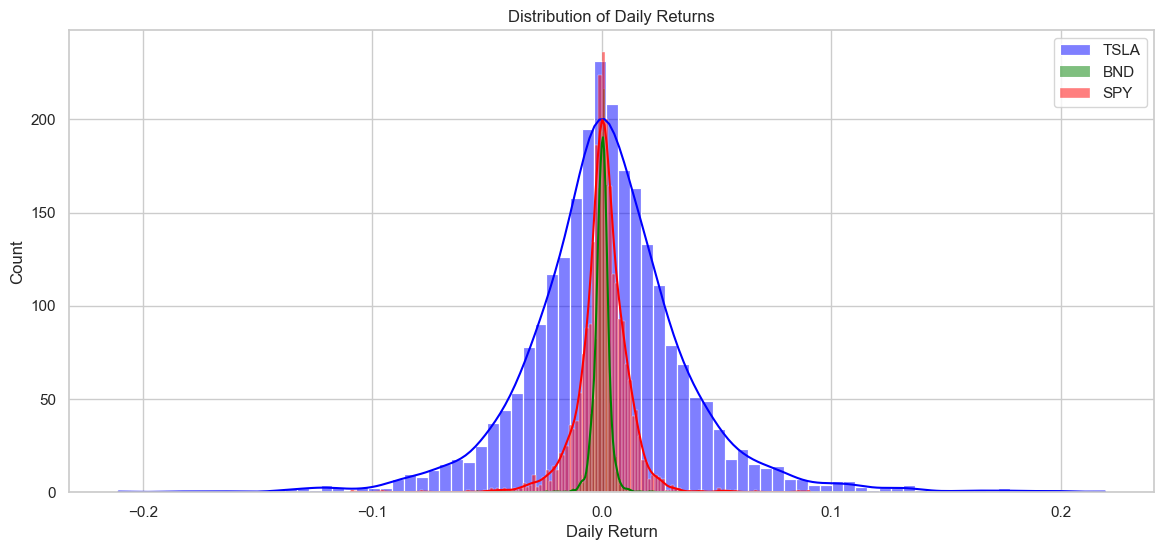

In [4]:
plt.figure(figsize=(14, 8))
plt.plot(tsla_data['Date'], tsla_data['Close'], label='TSLA', color='blue')
plt.plot(bnd_data['Date'], bnd_data['Close'], label='BND', color='green')
plt.plot(spy_data['Date'], spy_data['Close'], label='SPY', color='red')
plt.title('Closing Prices of TSLA, BND, and SPY Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

tsla_data['Daily Return'] = tsla_data['Close'].pct_change()
bnd_data['Daily Return'] = bnd_data['Close'].pct_change()
spy_data['Daily Return'] = spy_data['Close'].pct_change()

plt.figure(figsize=(14, 6))
sns.histplot(tsla_data['Daily Return'].dropna(), kde=True, color='blue', label='TSLA')
sns.histplot(bnd_data['Daily Return'].dropna(), kde=True, color='green', label='BND')
sns.histplot(spy_data['Daily Return'].dropna(), kde=True, color='red', label='SPY')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.legend()
plt.show()


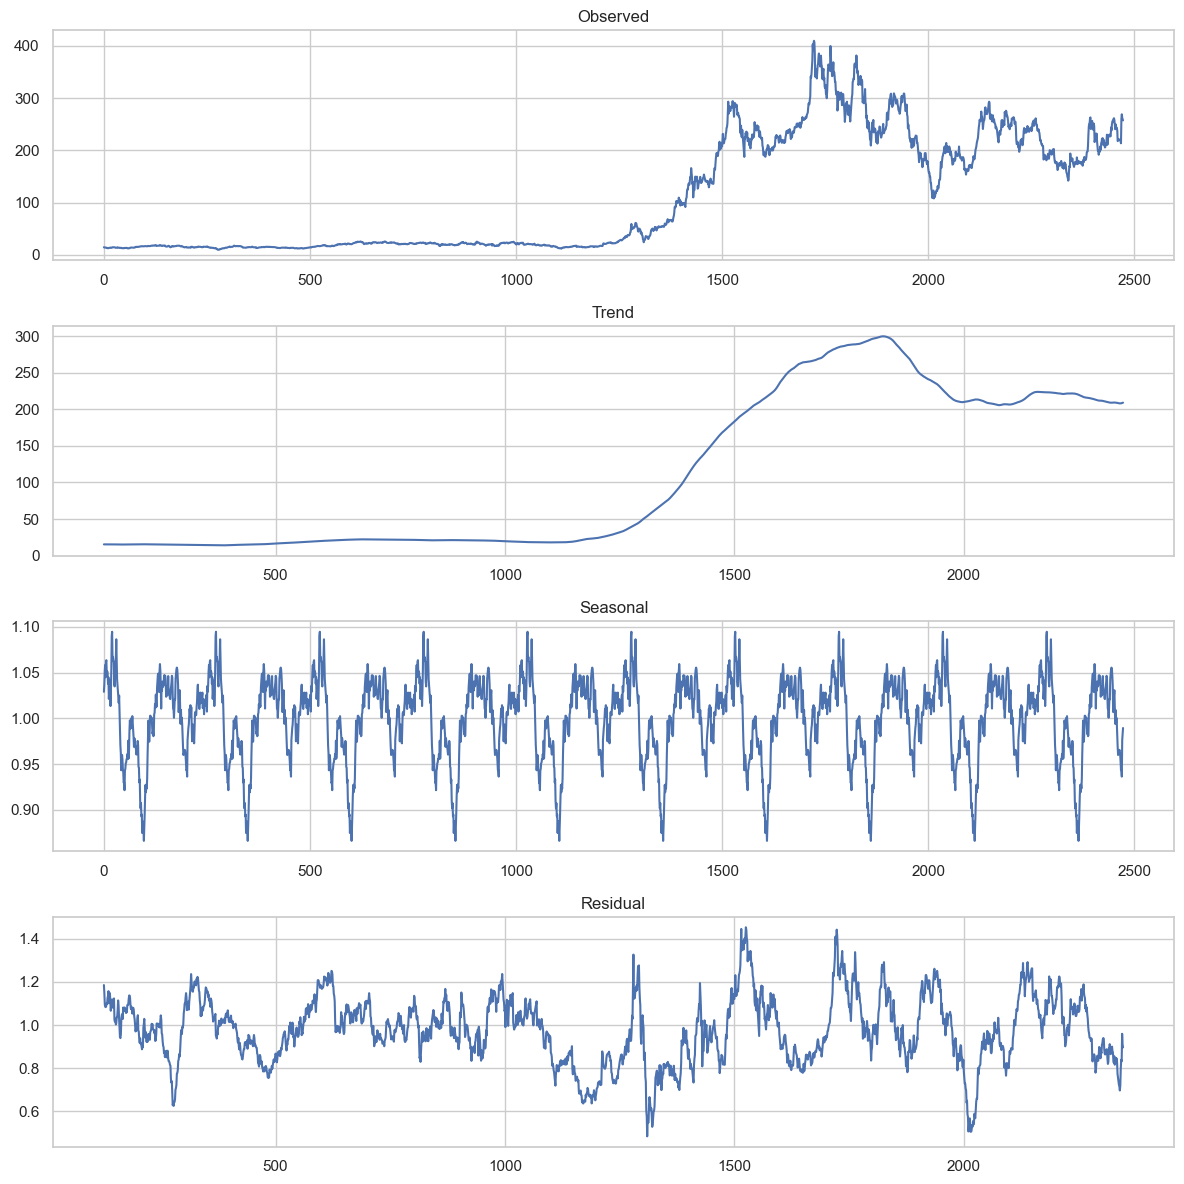

In [5]:
decomposition = seasonal_decompose(tsla_data['Close'], model='multiplicative', period=252)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12))
ax1.plot(decomposition.observed)
ax1.set_title('Observed')
ax2.plot(decomposition.trend)
ax2.set_title('Trend')
ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')
ax4.plot(decomposition.resid)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()


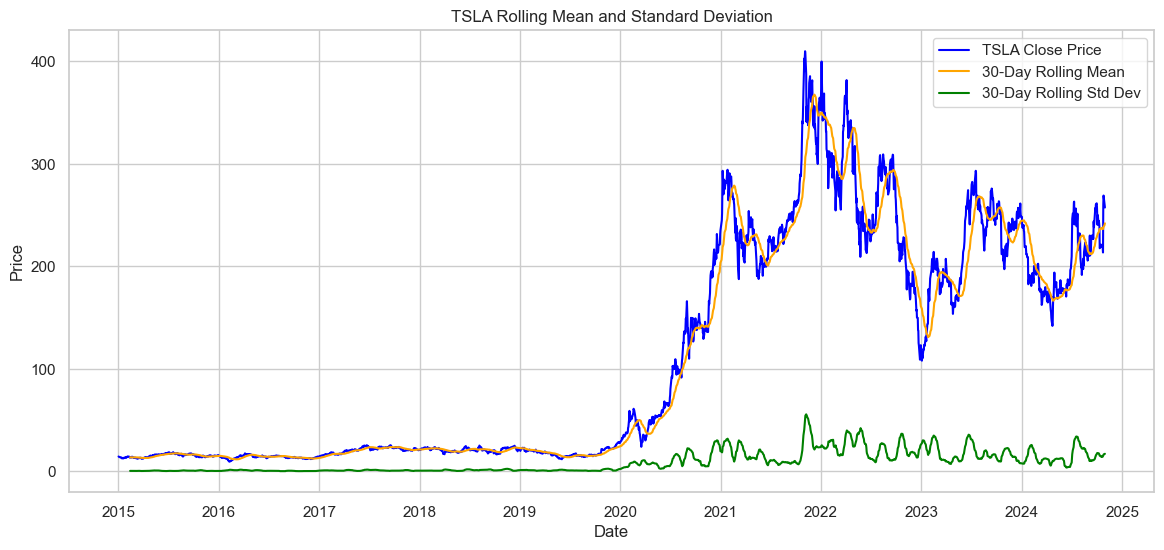

In [6]:
tsla_data['Rolling Mean'] = tsla_data['Close'].rolling(window=30).mean()
tsla_data['Rolling Std'] = tsla_data['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 6))
plt.plot(tsla_data['Date'], tsla_data['Close'], label='TSLA Close Price', color='blue')
plt.plot(tsla_data['Date'], tsla_data['Rolling Mean'], label='30-Day Rolling Mean', color='orange')
plt.plot(tsla_data['Date'], tsla_data['Rolling Std'], label='30-Day Rolling Std Dev', color='green')
plt.title('TSLA Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
